In [ ]:
#https://www.kaggle.com/datasets/shivamb/netflix-shows?select=netflix_titles.csv

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EDA/netflix_titles.csv')

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

<Axes: >

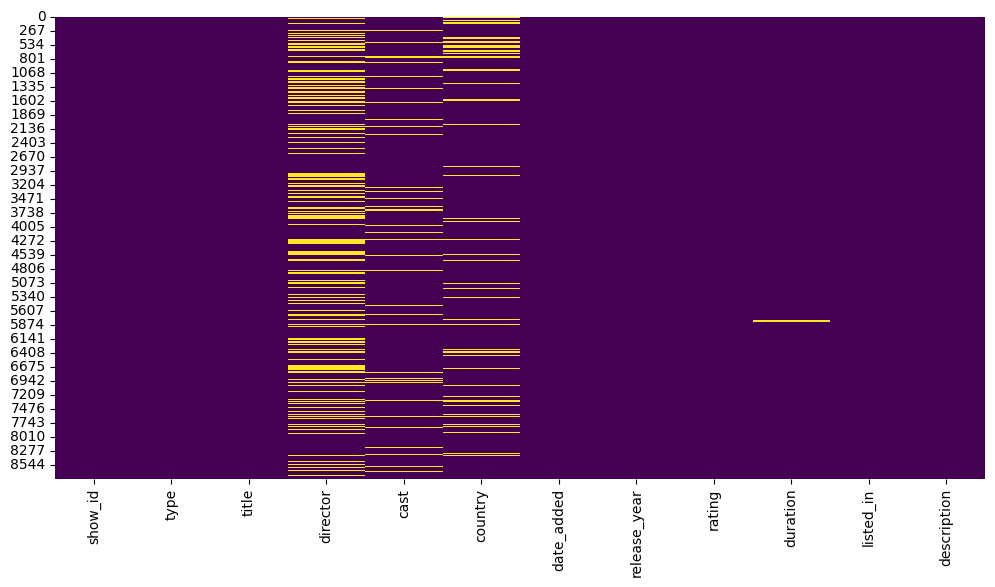

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap = 'viridis')

In [ ]:
df.dropna(subset=['director', 'cast', 'country', 'rating'], inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
df['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df['rating']=df['rating'].astype('string')
df['rating']=df['rating'].apply(lambda x: np.NaN if ('min' in x) else x)
df.dropna(inplace=True)

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


What are the top 10 countries with the most movies on Netflix?



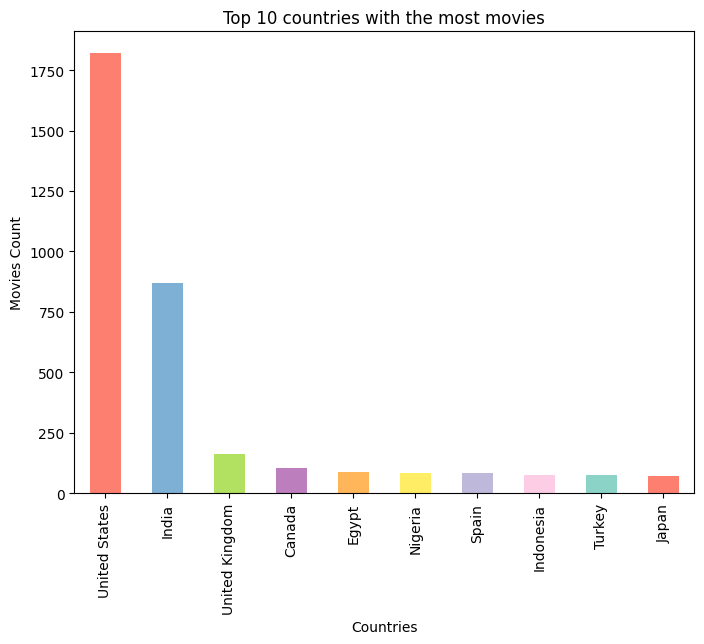

In [ ]:
print('What are the top 10 countries with the most movies on Netflix?\n')
plt.rcParams['figure.figsize']=8,6
country = df[df['type'] == 'Movie'] .country.value_counts().sort_values(ascending=False)[:10]
country.plot(kind='bar', color=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"])
plt.title('Top 10 countries with the most movies')
plt.xlabel('Countries')
plt.ylabel('Movies Count')
plt.show()

How has the number of movies on Netflix changed over the years?



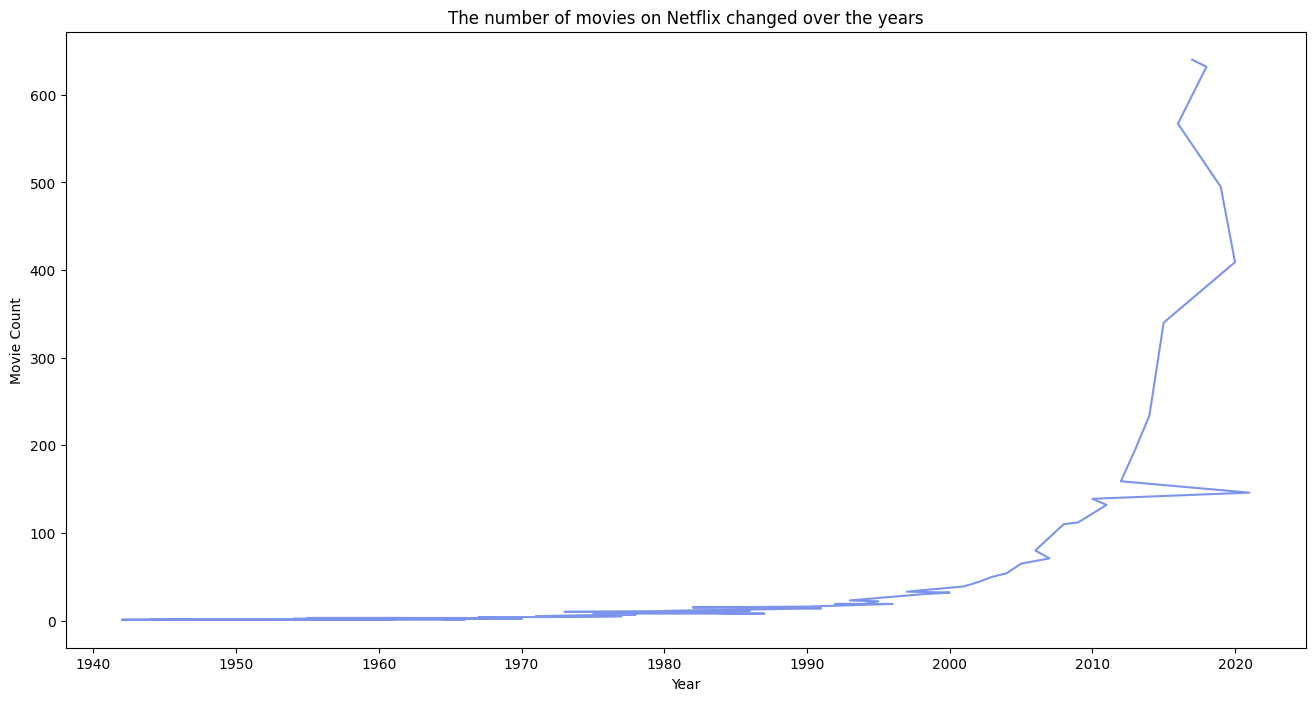

In [ ]:
print('How has the number of movies on Netflix changed over the years?\n')
plt.rcParams['figure.figsize']=16,8
country = df[df['type'] == 'Movie'] .release_year.value_counts()
country.plot(kind='line', color='#7c94eb')
plt.title('The number of movies on Netflix changed over the years')
plt.xlabel('Year')
plt.ylabel('Movie Count')
plt.show()

Which directors have the highest number of movies on Netflix?



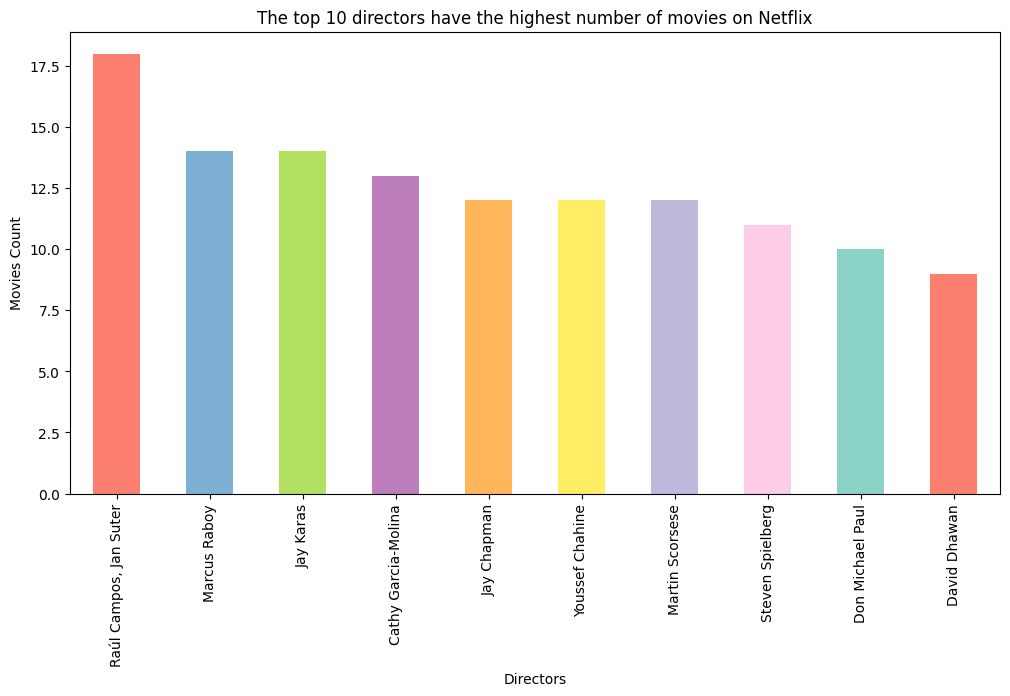

In [ ]:
print('Which directors have the highest number of movies on Netflix?\n')
plt.rcParams['figure.figsize']=12,6
country = df[df['type'] == 'Movie'].director.value_counts().sort_values(ascending=False)[:10]
country.plot(kind='bar', color=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"])
plt.title('The top 10 directors have the highest number of movies on Netflix')
plt.xlabel('Directors')
plt.ylabel('Movies Count')
plt.show()

What are the different genres of movies available on Netflix?



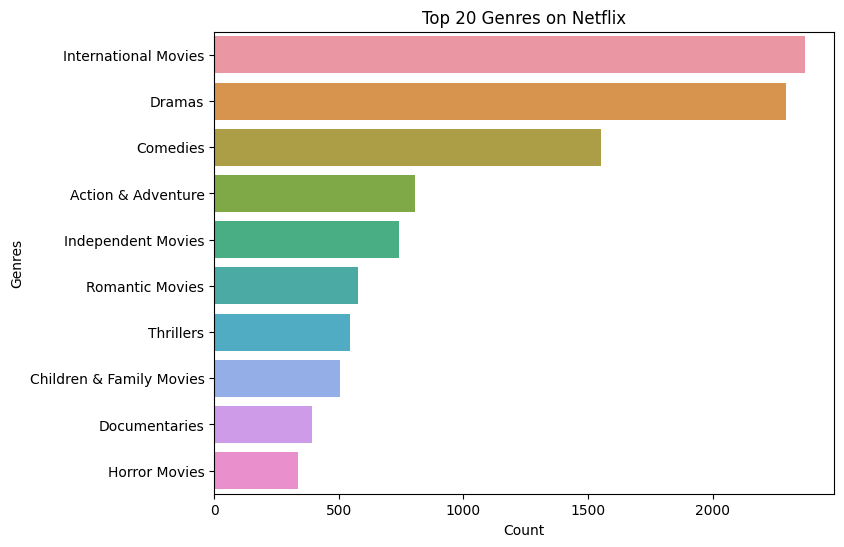

In [ ]:
print('What are the different genres of movies available on Netflix?\n')
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(8,6))
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

What is the distribution of movies across different countries in the dataset?

United Kingdom



<ipython-input-114-93b8ab3dd152>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i in df[df['type']=='Movie'][df['country']=='United Kingdom']['listed_in']:


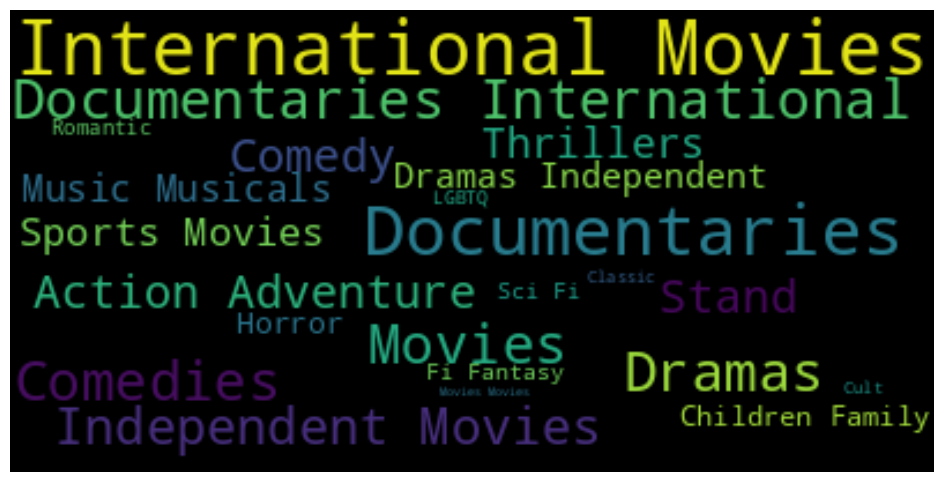

In [ ]:
print('What is the distribution of movies across different countries in the dataset?\n')
print('United Kingdom\n')
text=''
for i in df[df['type']=='Movie'][df['country']=='United Kingdom']['listed_in']:
  lis=i.split(', ')
  text += ' ' + ' '.join(lis)
  
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
  